In [ ]:


#                     ПІДСУМКОВА КОНТРОЛЬНА РОБОТА
#                         МАШИННЕ НАВЧАННЯ

#                           Завдання 3
#   Розробити згорткову нейронну мережу для розпізнавання зображень датасету 
#                            cifar_10



In [16]:

# імпорт і завантаження даних

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [17]:
# створення згорткової нейронної мережі і компіляція моделі

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Навчання моделі
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/10
782/782 [==============================] - 27s 35ms/step - loss: 0.8692 - accuracy: 0.6943 - val_loss: 0.9680 - val_accuracy: 0.6617
Epoch 2/10
782/782 [==============================] - 28s 36ms/step - loss: 0.8222 - accuracy: 0.7106 - val_loss: 0.9137 - val_accuracy: 0.6829
Epoch 3/10
782/782 [==============================] - 27s 35ms/step - loss: 0.7743 - accuracy: 0.7291 - val_loss: 0.9406 - val_accuracy: 0.6735
Epoch 4/10
782/782 [==============================] - 28s 36ms/step - loss: 0.7353 - accuracy: 0.7407 - val_loss: 0.9146 - val_accuracy: 0.6893
Epoch 5/10
782/782 [==============================] - 28s 35ms/step - loss: 0.7059 - accuracy: 0.7506 - val_loss: 0.8998 - val_accuracy: 0.6919
Epoch 6/10
782/782 [==============================] - 28s 36ms/step - loss: 0.6731 - accuracy: 0.7641 - val_loss: 0.8942 - val_accuracy: 0.7070
Epoch 7/10
782/782 [==============================] - 28s 35ms/step - loss: 0.6412 - accuracy: 0.7740 - val_loss: 0.8781 - val_accuracy:

313/313 [==============================] - 2s 8ms/step - loss: 0.8764 - accuracy: 0.7179
Test accuracy: 0.7178999781608582


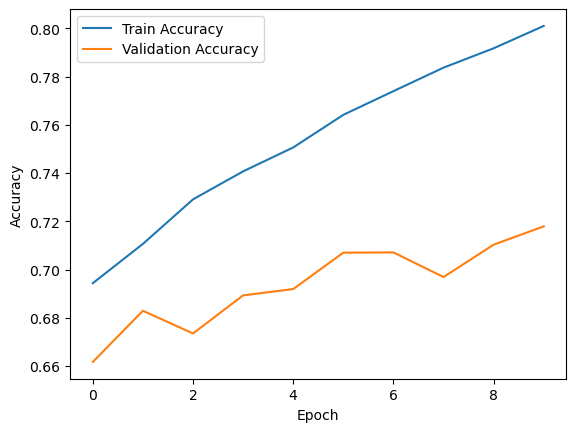

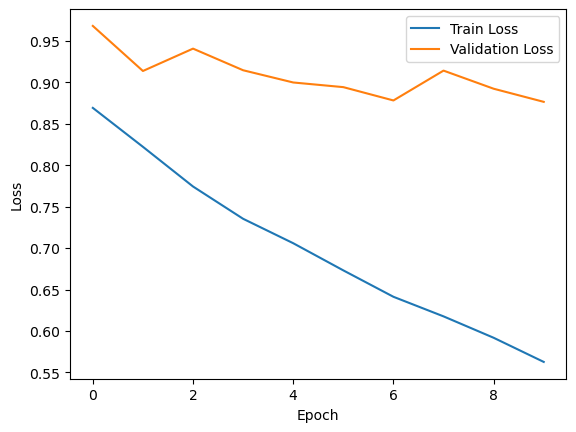

In [21]:

# Функція втрат і точності.

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 3s 8ms/step


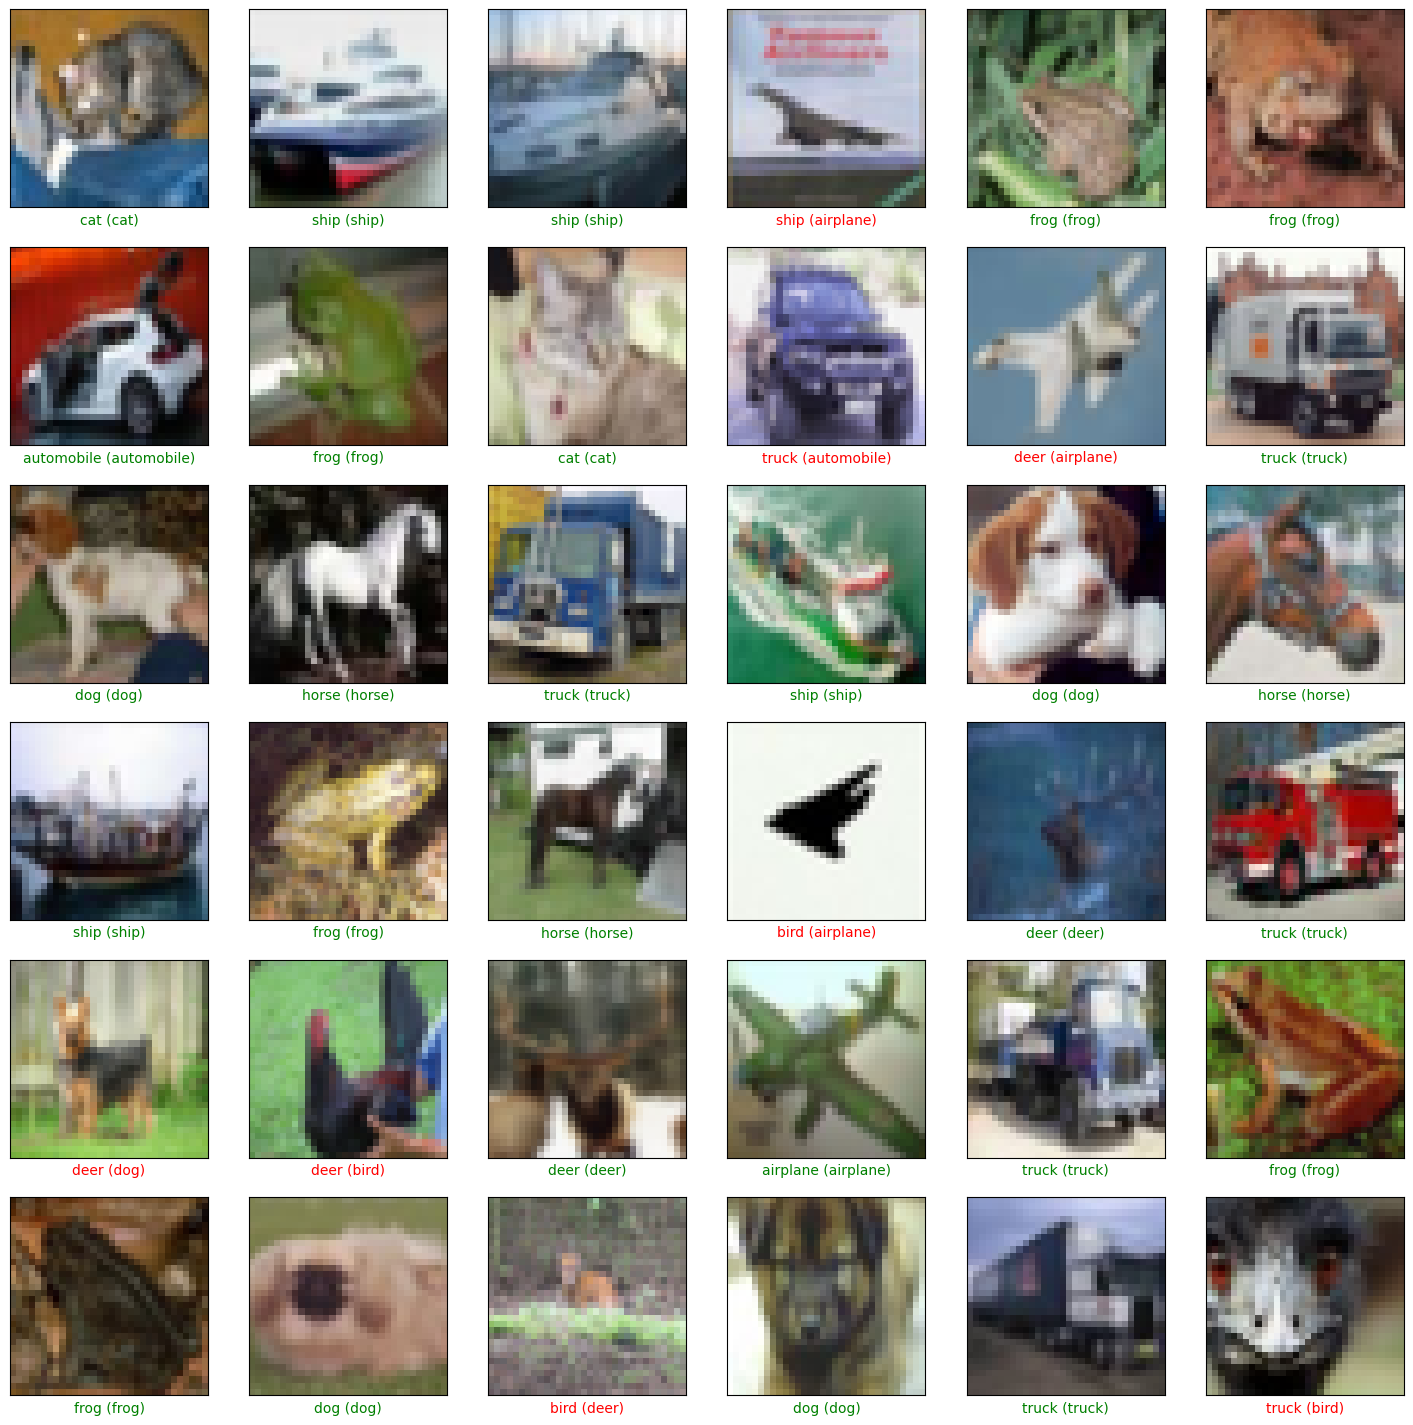

In [23]:
# Візуалізація
predictions = model.predict(test_images)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(18, 18))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels[i])
    
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

plt.show()